In [216]:
import yahoo_fin.stock_info as si
import pandas as pd
import nsepy
import numpy as np
import re

from time import sleep

In [217]:
import requests # for http requests
from bs4 import BeautifulSoup # for html parsing and scraping
from fastnumbers import isfloat 
from fastnumbers import fast_float
from multiprocessing.dummy import Pool as ThreadPool 
import bs4

In [218]:
def ffloat(string):
    if string is None:
        return np.nan
    if type(string)==float or type(string)==np.float64:
        return string
    if type(string)==int or type(string)==np.int64:
        return string
    return fast_float(string.split(" ")[0].replace(',','').replace('%',''),
                      default=np.nan)

In [219]:
def get_table( url):
#     round_url = f'{url}/{round}'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    rows = []
    for child in soup.find_all('table')[1].children:
        row = []
        for td in child:
            try:
                row.append(td.text.replace('\n', ''))
            except:
                continue
        if len(row) > 0:
            rows.append(row)

    df = pd.DataFrame(rows[1:], columns=rows[0])
    return df

In [220]:
def rel(res):
    res = res.apply(lambda x: x.str.replace(',', ''))
    return res

In [221]:
# mylist = ["dog", "cat", "wildcat", "thundercat", "cow", "hooo"]
# PNL_list[j],'Total Revenue'
# newlist = # Read Note below
# print(newlist)
# Infosys_pnl[Infosys_pnl[:,1]=='Total Revenue'].astype('float').values

In [222]:
# PNL_list['PNL_Infosys'].columns

In [223]:
def example(stock):
    Months = []
#     stocks_list =  stock.keys()
#     for i in stocks_list:
    r = re.compile("Mar.*")
#         stock_data = stock[i]
    Months =  list(filter(r.match, stock.columns))
    return Months
    

In [224]:
# months = example(PNL_list['pnl_Infosys'])
# # len(months)
# print(months)

##### Functions defined in loop

In [225]:
def cagr(stock, mode):
    months = example(stock)
    result = []

    for i in range(0, len(months)-1):

        result.append( ((stock[stock.iloc[:, 1] == mode][months[i]]).astype('float').values  
                 / (stock[stock.iloc[:, 1] == mode][months[i+1]]).astype('float').values - 1)*100  )
    return result


In [226]:
def cagr_check(stock, mode):
    months = example(stock)
    result = []

#     for i in range(0, len(months)-1):

    return months

In [227]:
cagr_eg = {}
for i in PNL_list:
    ab = cagr_check(PNL_list[i],'Total Revenue')

In [228]:
ab

['Mar 21', 'Mar 20', 'Mar 19', 'Mar 18', 'Mar 17']

In [229]:
cagr_revenue = {}
for i in PNL_list:
    cagr_revenue["{}".format(i)] = cagr(PNL_list[i],'Total Revenue')

In [230]:
def value(stock, mode):
    months = example(stock)
    values = []
    for i in range(0, len(months)):

        values.append((stock[stock.iloc[:, 1] == mode][months[i]]).astype('float').values)

    return values

In [231]:
def freecashflow(stockcs, stockbs):
    months = example(stockcs)
    value = []
    for i in range(0, len(months)):

        value.append((stockcs[stockcs.iloc[:, 1] == 'Net CashFlow From Operating Activities'][months[i]]).astype('float').values - (stockbs[stockbs.iloc[:, 1] == 'Fixed Assets'][months[i]]).astype('float').values)

    return value

In [232]:
def roe(stockPNL, stockbs):
    months = example(stockPNL)
    returnequity = []
    for i in range(0, len(months)):

        returnequity.append((stockPNL[stockPNL.iloc[:, 1] == 'Profit/Loss For The Period'][months[i]]).astype('float').values / (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds'][months[i]]).astype('float').values)

    return returnequity

In [233]:
# def debt( stockbs):
#     months = example(stockbs)
#     debtequity = []
#     for i in range(0, len(months)):

#         debtequity.append((stockbs[stockbs.iloc[:, 1] == 'Total Capital And Liabilities'][months[i]]).astype('float').values )

#     return debtequity

In [234]:
# def equity( stockbs):
#     months = example(stockbs)
#     debtequity = []
#     for i in range(0, len(months)):

#         debtequity.append( (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds'][months[i]]).astype('float').values)

#     return debtequity

In [235]:
# balancesheet_list

In [236]:
# debtoo = {}
# for i in (balancesheet_list):
#     debtoo["{}".format(i)] =  debt(balancesheet_list[j])

In [237]:
# equityoo = {}
# for i in (balancesheet_list):
#     equityoo["{}".format(i)] =  debt(balancesheet_list[j])

In [238]:
def DE( stockbs):
    months = example(stockbs)
    debtequity = []
    for i in range(0, len(months)):

        debtequity.append((stockbs[stockbs.iloc[:, 1] == 'Total Capital And Liabilities'][months[i]]).astype('float').values / (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds'][months[i]]).astype('float').values)

    return debtequity

In [239]:
# PNL_list.keys()

In [240]:
def get_scrip_info(url):
    original_url = url
    key_val_pairs = {}
    
    page_response = requests.get(url, timeout=240)
    page_content = BeautifulSoup(page_response.content, "html.parser")
    name = page_content.find('h1').text


    volume = ffloat(page_content.find('td',{'class':'nsevol bsevol'}).text)
    eps = ffloat(page_content.find('td',{'class':'nseceps bseceps'}).text)
    pe = ffloat(page_content.find('td',{'class':'nsepe bsepe'}).text)
    sector_pe = ffloat(page_content.find('td',{'class':'nsesc_ttm bsesc_ttm'}).text)
    market_cap = ffloat(page_content.find('td',{'class':'nsemktcap bsemktcap'}).text)
    open_price = ffloat(page_content.find('td',{'class':'nsemktcap bsemktcap'}).text)
    opn_prc = ffloat(page_content.find('td',{'class':'nseopn bseopn'}).text)
    cls_prc = ffloat(page_content.find('td',{'class':'nseprvclose bseprvclose'}).text)
    vwap = ffloat(page_content.find('td',{'class':'nsevwap bsevwap'}).text)
    nsebeta = ffloat(page_content.find('td',{'class':'Beta'}))
    bsebeta = ffloat(page_content.find('td',{'class':'bsebeta'}))
    high = ffloat(page_content.find('td',{'class':'nseHP bseHP'}).text)
    low = ffloat(page_content.find('td',{'class':'nseLP bseLP'}).text)
    wh52 = ffloat(page_content.find('td',{'class':'nseH52 bseH52'}).text)
    wl52 = ffloat(page_content.find('td',{'class':'nseL52 bseL52'}).text)
    pb = ffloat(page_content.find('td',{'class':'nsepb bsepb'}).text)
    fv = ffloat(page_content.find('td',{'class':'nsefv bsefv'}).text)
    return high,low , name,nsebeta, volume, eps, pe, sector_pe, market_cap

##### URLs

In [241]:
# Purchsed Stock

# Balance Sheet
KPITE_bs = "https://www.moneycontrol.com/financials/kpittechnologies/balance-sheetVI/KPITT54265"
KPITEC_bs = "https://www.moneycontrol.com/financials/birlasoft/balance-sheetVI/KPI02"
WIPRO_bs = "https://www.moneycontrol.com/financials/wipro/balance-sheetVI/W"

# PnL
KPITE_pnl = "https://www.moneycontrol.com/financials/kpittechnologies/profit-lossVI/KPITT54265"
KPITEC_pnl = "https://www.moneycontrol.com/financials/birlasoft/profit-lossVI/KPI02"
WIPRO_pnl = "https://www.moneycontrol.com/financials/wipro/profit-lossVI/W"
# Cash Statement
KPITE_cs = "https://www.moneycontrol.com/financials/kpittechnologies/cash-flowVI/KPITT54265"
KPITEC_cs = "https://www.moneycontrol.com/financials/kpittechnologies/cash-flowVI/kpi02"
WIPRO_cs = "https://www.moneycontrol.com/financials/wipro/cash-flowVI/W"

In [242]:
# Benchmark Stocks
# Balance Sheet
Infosys = "https://www.moneycontrol.com/financials/infosys/balance-sheetVI/IT"
TCS = "https://www.moneycontrol.com/financials/tataconsultancyservices/balance-sheetVI/TCS"
LandT_tech = "https://www.moneycontrol.com/financials/lttechnologyservices/balance-sheetVI/LTS"
hcl = "https://www.moneycontrol.com/financials/hcltechnologies/balance-sheetVI/HCL02"
techmahindra = "https://www.moneycontrol.com/financials/techmahindra/balance-sheetVI/TM4"
mindtree = "https://www.moneycontrol.com/financials/mindtree/balance-sheetVI/MT13"
landtinfotech = "https://www.moneycontrol.com/financials/larsentoubroinfotech/balance-sheetVI/LI12"
mphasis ="https://www.moneycontrol.com/financials/mphasis/balance-sheetVI/MB02"
coforge = "https://www.moneycontrol.com/financials/coforgelimited/balance-sheetVI/NII02"

In [243]:
# PnL

Infosys_pnl = "https://www.moneycontrol.com/financials/infosys/profit-lossVI/IT"
TCS_pnl = "https://www.moneycontrol.com/financials/tataconsultancyservices/profit-lossVI/TCS"
LandT_tech_pnl = "https://www.moneycontrol.com/financials/lttechnologyservices/profit-lossVI/LTS"
hcl_pnl = "https://www.moneycontrol.com/financials/hcltechnologies/profit-lossVI/HCL02"
techmahindra_pnl ="https://www.moneycontrol.com/financials/techmahindra/profit-lossVI/TM4"
mindtree_pnl = "https://www.moneycontrol.com/financials/mindtree/profit-lossVI/MT13"
landtinfotech_pnl = "https://www.moneycontrol.com/financials/larsentoubroinfotech/profit-lossVI/LI12"
mphasis_pnl = "https://www.moneycontrol.com/financials/mphasis/profit-lossVI/MB02"
coforge_pnl = "https://www.moneycontrol.com/financials/coforgelimited/profit-lossVI/NII02"

In [244]:
Infosys_cs = "https://www.moneycontrol.com/financials/infosys/consolidated-cash-flowVI/IT/1"
TCS_cs = "https://www.moneycontrol.com/financials/tataconsultancyservices/cash-flowVI/TCS"
LandT_tech_cs = "https://www.moneycontrol.com/financials/larsentoubro/cash-flowVI/LT"
hcl_cs = "https://www.moneycontrol.com/financials/hcltechnologies/cash-flowVI/HCL02"
techmahindra_cs = "https://www.moneycontrol.com/financials/techmahindra/consolidated-cash-flowVI/TM4"
mindtree_cs ="https://www.moneycontrol.com/financials/mindtree/cash-flowVI/MT13"
landtinfotech_cs = "https://www.moneycontrol.com/financials/larsentoubroinfotech/cash-flowVI/li12"
mphasis_cs = "https://www.moneycontrol.com/financials/mphasis/cash-flowVI/MB02"
coforge_cs = "https://www.moneycontrol.com/financials/coforgelimited/cash-flowVI/nii02"

In [245]:
BS = [KPITE_bs,KPITEC_bs, WIPRO_bs ,Infosys,TCS ,LandT_tech,hcl  ,techmahindra,mindtree, landtinfotech,mphasis ,coforge]
BS_name = ['KPITE','KPITEC', 'WIPRO' ,'Infosys','TCS' ,'LandT_tech','hcl'  ,'techmahindra','mindtree', 'landtinfotech','mphasis' ,'coforge']
balancesheet_list = {}
for i,j in zip(BS,BS_name):
    balancesheet_list['BS_'+str(j)] =  get_table(i)

In [246]:
def get_table( url):
#     round_url = f'{url}/{round}'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    rows = []
    for child in soup.find_all('table')[1].children:
        row = []
        for td in child:
            try:
                row.append(td.text.replace('\n', ''))
            except:
                continue
        if len(row) > 0:
            rows.append(row)

    df = pd.DataFrame(rows[1:], columns=rows[0])
    return df

In [247]:
PNL = [KPITE_pnl, KPITEC_pnl, WIPRO_pnl, Infosys_pnl, TCS_pnl, LandT_tech_pnl,  hcl_pnl, techmahindra_pnl, mindtree_pnl,landtinfotech_pnl, mphasis_pnl, coforge_pnl]
PNL_name =  ['KPITE','KPITEC' , 'WIPRO' ,'Infosys','TCS' ,'LandT_tech','hcl'  ,'techmahindra','mindtree', 'landtinfotech','mphasis' ,'coforge']
PNL_list = {}
for i,j in zip(PNL,PNL_name):
    PNL_list['pnl_'+str(j)] =  get_table(i)

In [248]:
cs = [KPITE_cs ,KPITEC_cs, WIPRO_cs ,Infosys_cs,TCS_cs ,LandT_tech_cs ,hcl_cs  ,techmahindra_cs,mindtree_cs, landtinfotech_cs,mphasis_cs ,coforge_cs]
cs_name = ['KPITE','KPITEC' , 'WIPRO' ,'Infosys','TCS' ,'LandT_tech','hcl'  ,'techmahindra','mindtree', 'landtinfotech','mphasis' ,'coforge']
cs_list = {}
for i,j in zip(cs,cs_name):
    cs_list['cs_'+str(j)] =  get_table(i)

In [249]:
for i in cs_list.keys(): 
    cs_list[i] = rel(cs_list[i])
for i in balancesheet_list.keys():
    balancesheet_list[i] = rel(balancesheet_list[i])
for i in PNL_list.keys():
    PNL_list[i] = rel(PNL_list[i])

In [250]:
# PNL_list


In [251]:
cagr_revenue = {}
for i in PNL_list:
    cagr_revenue["{}".format(i)] = cagr(PNL_list[i],'Total Revenue')
#    revenue + str(i) = cagr(PNL_list[i],'Total Revenue')

C:\Users\Aman\AppData\Local\Temp/ipykernel_480/1519330944.py:7: RuntimeWarning: divide by zero encountered in true_divide
  result.append( ((stock[stock.iloc[:, 1] == mode][months[i]]).astype('float').values


In [252]:
# PNL_list

In [253]:
cagr_revenue.keys()

dict_keys(['pnl_KPITE', 'pnl_KPITEC', 'pnl_WIPRO', 'pnl_Infosys', 'pnl_TCS', 'pnl_LandT_tech', 'pnl_hcl', 'pnl_techmahindra', 'pnl_mindtree', 'pnl_landtinfotech', 'pnl_mphasis', 'pnl_coforge'])

In [254]:
# def cagr_check(stock, mode):
#     months = example(stock)
#     result = []

#     for i in range(0, len(months)-1):

#         result.append( (   (stock[stock.iloc[:, 1] == mode][months[i]]).astype('float').values  ) )
# #                  / (stock[stock.iloc[:, 1] == mode][months[i+1]]).astype('float').values - 1)*100  )
#     return result

In [255]:
cagr_check(PNL_list['pnl_WIPRO'],'Total Revenue')

['Mar 21', 'Mar 20', 'Mar 19', 'Mar 18', 'Mar 17']

In [256]:
cagr_revenue['pnl_WIPRO']

[array([-0.38064731]),
 array([4.32254145]),
 array([7.42282198]),
 array([-3.08890062])]

In [257]:
cagr_profit = {}
for i in PNL_list:
    cagr_profit["{}".format(i)] = cagr(PNL_list[i],'Profit/Loss For The Period')

In [258]:
cagr_revenue

{'pnl_KPITE': [array([-16.1481542]), array([267.72399278]), array([inf])],
 'pnl_KPITEC': [array([10.37725767]),
  array([45.79308196]),
  array([-30.82048276]),
  array([11.1471359])],
 'pnl_WIPRO': [array([-0.38064731]),
  array([4.32254145]),
  array([7.42282198]),
  array([-3.08890062])],
 'pnl_Infosys': [array([8.11283595]),
  array([7.61990021]),
  array([15.15918739]),
  array([5.78819907])],
 'pnl_TCS': [array([1.4169082]),
  array([6.56819346]),
  array([26.79165172]),
  array([6.06409558])],
 'pnl_LandT_tech': [array([-4.73338772]),
  array([10.90639908]),
  array([31.62638374]),
  array([16.65877301])],
 'pnl_hcl': [array([10.3786943]),
  array([23.77596301]),
  array([17.74753019]),
  array([12.33599684])],
 'pnl_techmahindra': [array([-3.25687841]),
  array([12.10765196]),
  array([10.97909176]),
  array([5.54320131])],
 'pnl_mindtree': [array([3.56637202]),
  array([10.25341734]),
  array([28.93329223]),
  array([8.24746315])],
 'pnl_landtinfotech': [array([11.13908296]),

In [259]:
cagr_profit.keys()

dict_keys(['pnl_KPITE', 'pnl_KPITEC', 'pnl_WIPRO', 'pnl_Infosys', 'pnl_TCS', 'pnl_LandT_tech', 'pnl_hcl', 'pnl_techmahindra', 'pnl_mindtree', 'pnl_landtinfotech', 'pnl_mphasis', 'pnl_coforge'])

In [260]:
cagr_profit.keys(  )

dict_keys(['pnl_KPITE', 'pnl_KPITEC', 'pnl_WIPRO', 'pnl_Infosys', 'pnl_TCS', 'pnl_LandT_tech', 'pnl_hcl', 'pnl_techmahindra', 'pnl_mindtree', 'pnl_landtinfotech', 'pnl_mphasis', 'pnl_coforge'])

In [261]:
cagr_EBITDA = {}
for i in PNL_list:
#     print(i)
    cagr_EBITDA["{}".format(i)] = cagr(PNL_list[i],'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax')

In [262]:
OprtCF = {}
for i in cs_list:
    OprtCF["{}".format(i)] = value(cs_list[i],'Net CashFlow From Operating Activities')
    

In [263]:
FreeCF = {}
for i,j in zip(cs_list,balancesheet_list):
#     print(cs_list[i],balancesheet_list[j])
  FreeCF["{}-{}".format(i,j)] = freecashflow(cs_list[i],balancesheet_list[j])
    

In [264]:
FreeCF.keys()

dict_keys(['cs_KPITE-BS_KPITE', 'cs_KPITEC-BS_KPITEC', 'cs_WIPRO-BS_WIPRO', 'cs_Infosys-BS_Infosys', 'cs_TCS-BS_TCS', 'cs_LandT_tech-BS_LandT_tech', 'cs_hcl-BS_hcl', 'cs_techmahindra-BS_techmahindra', 'cs_mindtree-BS_mindtree', 'cs_landtinfotech-BS_landtinfotech', 'cs_mphasis-BS_mphasis', 'cs_coforge-BS_coforge'])

In [265]:
PNL_list.keys()

dict_keys(['pnl_KPITE', 'pnl_KPITEC', 'pnl_WIPRO', 'pnl_Infosys', 'pnl_TCS', 'pnl_LandT_tech', 'pnl_hcl', 'pnl_techmahindra', 'pnl_mindtree', 'pnl_landtinfotech', 'pnl_mphasis', 'pnl_coforge'])

In [266]:
def roe(stockPNL, stockbs):
    months = example(stockPNL)
    returnequity = []
    for i in range(0, len(months)):

        returnequity.append((stockPNL[stockPNL.iloc[:, 1] == 'Profit/Loss For The Period'][months[i]]).astype('float').values / (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds'][months[i]]).astype('float').values)

    return returnequity

In [267]:
# months = example(PNL_list['Infosys'])
# # months = example(PNL_list['Infosys_pnl'])
# months

In [268]:
returnequity = {}
for i,j in zip(PNL_list,balancesheet_list):
    returnequity["{}-{}".format(i,j)] =  roe(PNL_list[i],balancesheet_list[j])

In [269]:
debtequity = {}
for i in (balancesheet_list):
#     print(balancesheet_list[i])
    debtequity["{}".format(i)] =  DE(balancesheet_list[i])

In [270]:
# Stocs URLs
KPITE_url = "https://www.moneycontrol.com/india/stockpricequote/it-servicesconsulting/kpittechnologies/KPITT54265"
KPITEC_url = "https://www.moneycontrol.com/india/stockpricequote/computers-software-mediumsmall/birlasoft/KPI02"
WIPRO_url = "https://www.moneycontrol.com/india/stockpricequote/computers-software/wipro/W"
Infosys_url = "https://www.moneycontrol.com/india/stockpricequote/computers-software/infosys/IT" 
TCS_url = "https://www.moneycontrol.com/india/stockpricequote/computers-software/tataconsultancyservices/TCS"
LandT_tech_url =  "https://www.moneycontrol.com/india/stockpricequote/computers-software/lttechnologyservices/LTS"
hcl_url =   "https://www.moneycontrol.com/india/stockpricequote/computers-software/hcltechnologies/HCL02"
mindtree_url = "https://www.moneycontrol.com/india/stockpricequote/computers-software/mindtree/MT13"
landtinfotech_url =  "https://www.moneycontrol.com/india/stockpricequote/computers-software/larsentoubroinfotech/LI12"
mphasis_url = "https://www.moneycontrol.com/india/stockpricequote/computers-software/mphasis/MB02"
coforge_url = "https://www.moneycontrol.com/india/stockpricequote/computers-software/coforgelimited/NII02"
techmahindra_url = "https://www.moneycontrol.com/india/stockpricequote/computers-software/techmahindra/TM4"

In [271]:
url = [KPITE_url,KPITEC_url,WIPRO_url, Infosys_url,TCS_url,LandT_tech_url, hcl_url,mindtree_url,landtinfotech_url,mphasis_url,coforge_url,techmahindra_url ]
url_name = ['KPITE_url','KPITEC_url','WIPRO_url', 'Infosys_url','TCS_url','LandT_tech_url', 'hcl_url','mindtree_url','landtinfotech_url','mphasis_url','coforge_url','techmahindra_url' ]

In [326]:
stock = {}
for i,j in zip(url,url_name):
    stock["{}".format(j)]  = get_scrip_info(i)

In [327]:
stock['KPITE_url']

(564.0,
 531.55,
 'KPIT Technologies Ltd.',
 nan,
 2762058.0,
 8.83,
 61.53,
 39.44,
 14896.0)

In [277]:
# cagr(PNL_list['pnl_WIPRO'], 'Total Revenue')
cagr(PNL_list['pnl_KPITE'], 'Total Revenue')

C:\Users\Aman\AppData\Local\Temp/ipykernel_480/1519330944.py:7: RuntimeWarning: divide by zero encountered in true_divide
  result.append( ((stock[stock.iloc[:, 1] == mode][months[i]]).astype('float').values


[array([-16.1481542]), array([267.72399278]), array([inf])]

In [278]:
def summation(stock, mode, year):
        summation = (stock[stock.iloc[:, 1] == mode][year]).astype('float').values
        return summation

In [279]:
# def average_index(stock,mode, year): 
#     average = {}
#     average['{}{}'.format(str(mode) , str(year))] = 0
#     for i in stock: 
#         average['{}{}'.format(str(mode) , str(year))]  =  average['{}{}'.format(str(mode) , str(year))]  + summation(i,mode, year)
#     return average['{}{}'.format(str(mode) , str(year))]

##### Mean

In [280]:
index_stock_pnl = ['pnl_KPITE','pnl_KPITEC' ,'pnl_WIPRO' ,'pnl_Infosys', 'pnl_TCS', 'pnl_LandT_tech','pnl_hcl', 'pnl_techmahindra', 'pnl_mindtree' ,'pnl_landtinfotech','pnl_mphasis', 'pnl_coforge']
index_stock_cs =  ['cs_KPITE','cs_KPITEC' ,'cs_WIPRO' ,'cs_Infosys', 'cs_TCS', 'cs_LandT_tech','cs_hcl', 'cs_techmahindra', 'cs_mindtree' ,'cs_landtinfotech','cs_mphasis', 'cs_coforge']
index_stock_bs =  ['BS_KPITE','BS_KPITEC' ,'BS_WIPRO' ,'BS_Infosys', 'BS_TCS', 'BS_LandT_tech','BS_hcl', 'BS_techmahindra', 'BS_mindtree' ,'BS_landtinfotech','BS_mphasis', 'BS_coforge']

In [281]:
# cs_list.keys()
# balancesheet_list.keys()


In [282]:
for i in PNL_list:
    print(i)

pnl_KPITE
pnl_KPITEC
pnl_WIPRO
pnl_Infosys
pnl_TCS
pnl_LandT_tech
pnl_hcl
pnl_techmahindra
pnl_mindtree
pnl_landtinfotech
pnl_mphasis
pnl_coforge


In [283]:
def summation(stock, mode, year):
        summation = (stock[stock.iloc[:, 1] == mode][year]).astype('float').values
        return summation

In [284]:
# average_index(index_stock_pnl,'Total Revenue',  'Mar 21')
# for i in PNL_list:
#     print(i)
listr = ['pnl_KPITE','pnl_KPITEC']
for i in listr:
    janwar = summation(PNL_list[i], 'Total Revenue', 'Mar 21')
    
janwar

array([1652.48])

In [285]:
Sum_Sales_average21 = 0
Sum_Sales_average20 = 0
Sum_Profit_average21 = 0
Sum_Profit_average20 = 0
Sum_EBITDA_average21 = 0 
Sum_EBITDA_average20 = 0
Sum_DEliabilities_average21 = 0
Sum_DE_fundaverage21 = 0
Sum_fixedassets_average21 = 0
Sum_operatingcashflow_average21 = 0


for i in index_stock_pnl:
    
    Sum_Sales_average21 = Sum_Sales_average21 + summation(PNL_list[i], 'Total Revenue', 'Mar 21')
    Sum_Sales_average20 = Sum_Sales_average20 + summation(PNL_list[i], 'Total Revenue', 'Mar 20')
    Sum_Profit_average21 = Sum_Profit_average21 + summation(PNL_list[i], 'Profit/Loss For The Period', 'Mar 21')
    Sum_Profit_average20 = Sum_Profit_average20 + summation(PNL_list[i], 'Profit/Loss For The Period', 'Mar 20')   
    Sum_EBITDA_average21 = Sum_EBITDA_average21 + summation(PNL_list[i], 'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax', 'Mar 21')
    Sum_EBITDA_average20 = Sum_EBITDA_average20 + summation(PNL_list[i], 'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax', 'Mar 20')  
    
for i in index_stock_bs:
    Sum_DEliabilities_average21 = Sum_DEliabilities_average21 + summation(balancesheet_list[i] , 'Total Capital And Liabilities', 'Mar 21')
    Sum_DE_fundaverage21 = Sum_DE_fundaverage21 + summation(balancesheet_list[i], 'Total Shareholders Funds', 'Mar 21')
    Sum_fixedassets_average21 = Sum_fixedassets_average21 + summation(balancesheet_list[i], 'Fixed Assets', 'Mar 21')
    
# Sum_ROE_average21 = Sum_DE_average21

for i in index_stock_cs:
    Sum_operatingcashflow_average21 = Sum_operatingcashflow_average21 + summation(cs_list[i], 'Net CashFlow From Operating Activities', 'Mar 21')



##### Dataframe creation

In [286]:
FreeCF.keys()

dict_keys(['cs_KPITE-BS_KPITE', 'cs_KPITEC-BS_KPITEC', 'cs_WIPRO-BS_WIPRO', 'cs_Infosys-BS_Infosys', 'cs_TCS-BS_TCS', 'cs_LandT_tech-BS_LandT_tech', 'cs_hcl-BS_hcl', 'cs_techmahindra-BS_techmahindra', 'cs_mindtree-BS_mindtree', 'cs_landtinfotech-BS_landtinfotech', 'cs_mphasis-BS_mphasis', 'cs_coforge-BS_coforge'])

In [287]:
# FreeCF['cs_KPITE']

In [288]:
returnequity.keys()

dict_keys(['pnl_KPITE-BS_KPITE', 'pnl_KPITEC-BS_KPITEC', 'pnl_WIPRO-BS_WIPRO', 'pnl_Infosys-BS_Infosys', 'pnl_TCS-BS_TCS', 'pnl_LandT_tech-BS_LandT_tech', 'pnl_hcl-BS_hcl', 'pnl_techmahindra-BS_techmahindra', 'pnl_mindtree-BS_mindtree', 'pnl_landtinfotech-BS_landtinfotech', 'pnl_mphasis-BS_mphasis', 'pnl_coforge-BS_coforge'])

In [289]:
debtequity.keys()

dict_keys(['BS_KPITE', 'BS_KPITEC', 'BS_WIPRO', 'BS_Infosys', 'BS_TCS', 'BS_LandT_tech', 'BS_hcl', 'BS_techmahindra', 'BS_mindtree', 'BS_landtinfotech', 'BS_mphasis', 'BS_coforge'])

In [290]:
debtequity['BS_KPITE'][0]

array([1.25898862])

In [291]:
KPITE21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'KPITE': [cagr_revenue['pnl_KPITE'][0], cagr_profit['pnl_KPITE'][0], cagr_EBITDA['pnl_KPITE'][0], debtequity['BS_KPITE'][0], stock['KPITE_url'][6], returnequity['pnl_KPITE-BS_KPITE'][0], OprtCF['cs_KPITE'][0] ,FreeCF['cs_KPITE-BS_KPITE'][0]]})

KPITEC21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'KPITEC': [cagr_revenue['pnl_KPITEC'][0],  cagr_profit['pnl_KPITEC'][0], cagr_EBITDA['pnl_KPITEC'][0], debtequity['BS_KPITEC'][0],stock['KPITEC_url'][6], returnequity['pnl_KPITEC-BS_KPITEC'][0],  OprtCF['cs_KPITEC'][0] ,FreeCF['cs_KPITEC-BS_KPITEC'][0]]})


WIPRO21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'WIPRO': [cagr_revenue['pnl_WIPRO'][0], cagr_profit['pnl_KPITEC'][0], cagr_EBITDA['pnl_WIPRO'][0], debtequity['BS_WIPRO'][0],stock['WIPRO_url'][6], returnequity['pnl_WIPRO-BS_WIPRO'][0],  OprtCF['cs_WIPRO'][0] ,FreeCF['cs_WIPRO-BS_WIPRO'][0]]})





In [292]:
OprtCF.keys()

dict_keys(['cs_KPITE', 'cs_KPITEC', 'cs_WIPRO', 'cs_Infosys', 'cs_TCS', 'cs_LandT_tech', 'cs_hcl', 'cs_techmahindra', 'cs_mindtree', 'cs_landtinfotech', 'cs_mphasis', 'cs_coforge'])

In [293]:
Infosys21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'Infosys': [cagr_revenue['pnl_Infosys'][0], cagr_profit['pnl_Infosys'][0], cagr_EBITDA['pnl_Infosys'][0], debtequity['BS_Infosys'][0], stock['Infosys_url'][6], returnequity['pnl_Infosys-BS_Infosys'][0], OprtCF['cs_Infosys'][0] ,FreeCF['cs_Infosys-BS_Infosys'][0]]})

TCS21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'TCS': [cagr_revenue['pnl_TCS'][0], cagr_profit['pnl_TCS'][0], cagr_EBITDA['pnl_TCS'][0], debtequity['BS_TCS'][0], stock['TCS_url'][6], returnequity['pnl_TCS-BS_TCS'][0], OprtCF['cs_TCS'][0] ,FreeCF['cs_TCS-BS_TCS'][0]]})

LandT_tech21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'LandT_tech': [cagr_revenue['pnl_LandT_tech'][0], cagr_profit['pnl_LandT_tech'][0], cagr_EBITDA['pnl_LandT_tech'][0], debtequity['BS_LandT_tech'][0], stock['LandT_tech_url'][6], returnequity['pnl_LandT_tech-BS_LandT_tech'][0], OprtCF['cs_LandT_tech'][0] ,FreeCF['cs_LandT_tech-BS_LandT_tech'][0]]})

hcl21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'hcl': [cagr_revenue['pnl_hcl'][0], cagr_profit['pnl_hcl'][0], cagr_EBITDA['pnl_hcl'][0], debtequity['BS_hcl'][0], stock['hcl_url'][6], returnequity['pnl_hcl-BS_hcl'][0], OprtCF['cs_hcl'][0] ,FreeCF['cs_hcl-BS_hcl'][0]]})

techmahindra21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'techmahindra': [cagr_revenue['pnl_techmahindra'][0], cagr_profit['pnl_techmahindra'][0], cagr_EBITDA['pnl_techmahindra'][0], debtequity['BS_techmahindra'][0], stock['techmahindra_url'][6], returnequity['pnl_techmahindra-BS_techmahindra'][0], OprtCF['cs_techmahindra'][0] ,FreeCF['cs_techmahindra-BS_techmahindra'][0]]})

mindtree21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'mindtree': [cagr_revenue['pnl_mindtree'][0], cagr_profit['pnl_mindtree'][0], cagr_EBITDA['pnl_mindtree'][0], debtequity['BS_mindtree'][0], stock['mindtree_url'][6], returnequity['pnl_mindtree-BS_mindtree'][0], OprtCF['cs_mindtree'][0] ,FreeCF['cs_mindtree-BS_mindtree'][0]]})


landtinfotech21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'landtinfotech': [cagr_revenue['pnl_landtinfotech'][0], cagr_profit['pnl_landtinfotech'][0], cagr_EBITDA['pnl_landtinfotech'][0], debtequity['BS_landtinfotech'][0], stock['landtinfotech_url'][6], returnequity['pnl_landtinfotech-BS_landtinfotech'][0], OprtCF['cs_landtinfotech'][0] ,FreeCF['cs_landtinfotech-BS_landtinfotech'][0]]})

mphasis21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'mphasis': [cagr_revenue['pnl_mphasis'][0], cagr_profit['pnl_mphasis'][0], cagr_EBITDA['pnl_mphasis'][0], debtequity['BS_mphasis'][0], stock['mphasis_url'][6], returnequity['pnl_mphasis-BS_mphasis'][0], OprtCF['cs_mphasis'][0] ,FreeCF['cs_mphasis-BS_mphasis'][0]]})

coforge21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'coforge': [cagr_revenue['pnl_coforge'][0], cagr_profit['pnl_coforge'][0], cagr_EBITDA['pnl_coforge'][0], debtequity['BS_coforge'][0], stock['coforge_url'][6], returnequity['pnl_coforge-BS_coforge'][0], OprtCF['cs_coforge'][0] ,FreeCF['cs_coforge-BS_coforge'][0]]})


In [294]:
it_index = Infosys21.merge(TCS21, how='outer', on='Stake').merge(LandT_tech21, how='outer', on='Stake').merge(hcl21, how='outer', on='Stake').merge(techmahindra21, how='outer', on='Stake').merge(mindtree21, how='outer', on='Stake').merge(landtinfotech21, how='outer', on='Stake').merge(mphasis21, how='outer', on='Stake').merge(coforge21, how='outer', on='Stake')
it_index.head(10)

,Stake,Infosys,TCS,LandT_tech,hcl,techmahindra,mindtree,landtinfotech,mphasis,coforge
0,CAGR_Sales,[8.112835945049968],[1.4169081986971532],[-4.733387718777815],[10.3786943030157],[-3.256878410716768],[3.5663720200512783],[11.139082963256296],[20.989073811190817],[0.09540467482906934]
1,CAGR_Profit,[16.11657981084733],[-6.915213469633197],[-14.797468354430377],[-2.5197903891180706],[-6.514499944867125],[76.01458465440712],[15.137851069312024],[-7.858529865732833],[-43.2189349112426]
2,CAGR_EBITDA,[19.53411144210577],[0.3072086875758995],[-15.156398104265401],[11.031582714502996],[3.645774727129525],[80.78918788463858],[19.133034379671155],[4.188406214868401],[-41.84280730556126]
3,DE_Ratio,[1.3132627811717996],[1.462430141455197],[1.4431005059728752],[1.2711179482469634],[1.3344168695798198],[1.4728384198582873],[1.4391913311622815],[1.3791278523451003],[1.2463021439255442]
4,PE_Ratio,32.83,33.42,50.9,27.08,25.18,39.26,44.52,40.93,43.85
5,ROE,[0.2523101871915673],[0.4139369468139156],[0.20152091254752852],[0.20074392119945814],[0.1694914576561232],[0.2570972074283332],[0.25755785469321885],[0.25762114128606395],[0.13290122430890255]
6,Operating Cash Flow,[23224.0],[33822.0],[8350.79],[15765.0],[8093.8],[1995.3],[2179.5],[1289.94],[485.0]
7,Free Cash Flow,[7719.0],[16902.0],[7319.290000000001],[-5385.0],[4934.700000000001],[697.3],[1106.0],[693.5200000000001],[102.10000000000002]


In [295]:
CAGR_AverageIndex_Sales21 = Sum_Sales_average21 / Sum_Sales_average20 -1 
CAGR_AverageIndexProfit21 =  Sum_Profit_average21 / Sum_Profit_average20 -1 
CAGR_AverageIndex_EBITDA21 = Sum_EBITDA_average21 / Sum_EBITDA_average20 - 1

ROE_AverageIndex21 = Sum_Profit_average21 / Sum_DE_fundaverage21
DE_AverageIndex21 = Sum_DEliabilities_average21 / Sum_DE_fundaverage21 
Operatingcashflow_AverageIndex21 = Sum_operatingcashflow_average21 / len(index_stock_bs)
Fixedcashflow_AverageIndex21 = (Sum_operatingcashflow_average21 - Sum_fixedassets_average21) / len(index_stock_bs)
# power_index.iloc[:,1:] =  power_index.iloc[:,1:].astype('int')
# # Removin outlier PE
PE_AverageIndex21 = (it_index.iloc[4:5,1:].sum(axis =1).values  ) / (len(index_stock_bs))

In [296]:
PE_AverageIndex21

array([28.16416667])

In [297]:
Average21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'Average21': [CAGR_AverageIndex_Sales21, CAGR_AverageIndexProfit21, CAGR_AverageIndex_EBITDA21, DE_AverageIndex21,PE_AverageIndex21, ROE_AverageIndex21, Operatingcashflow_AverageIndex21 ,Fixedcashflow_AverageIndex21]})


In [298]:
personal_stock = KPITE21.merge(KPITEC21, how='outer', on='Stake').merge(WIPRO21, how='outer', on='Stake').merge(Average21, how='outer', on='Stake')
personal_stock.head(10) 

,Stake,KPITE,KPITEC,WIPRO,Average21
0,CAGR_Sales,[-16.1481542046523],[10.377257668056018],[-0.38064730842831684],[0.034937936100047695]
1,CAGR_Profit,[-47.587559540487526],[37.520426287744236],[37.520426287744236],[0.017811099769771355]
2,CAGR_EBITDA,[-52.173696776760835],[28.873334230717475],[15.235698647310514],[0.0825664196675937]
3,DE_Ratio,[1.258988619344253],[1.3158775053121232],[1.4530056408261425],[1.3777880289288615]
4,PE_Ratio,61.53,24.79,24.31,[28.16416666666667]
5,ROE,[0.08922319631392676],[0.13894791247918223],[0.22238161338237375],[0.27272562645864457]
6,Operating Cash Flow,[417.8],[554.12],[12727.7],[9075.4125]
7,Free Cash Flow,[126.47000000000003],[319.21000000000004],[3591.6000000000004],[3177.1825000000013]


In [299]:
# PE_AverageIndex21

In [300]:
# it_index.iloc[4:5,1:].sum(axis =1).values

In [301]:
# it_index.iloc[4:5]

In [302]:
# example( PNL_list['pnl_KPITE'])


In [303]:
# ((PNL_list['pnl_KPITE'][PNL_list['pnl_KPITE'].iloc[:, 1] == 'Total Revenue']['Mar 19']).astype('float').values  
#                  / (PNL_list['pnl_KPITE'][PNL_list['pnl_KPITE'].iloc[:, 1] == 'Total Revenue']['Mar 18']).astype('float').values - 1)*100

In [304]:
# (PNL_list['pnl_KPITE'][PNL_list['pnl_KPITE'].iloc[:, 1] == 'Total Revenue']['Mar 18']).astype('float').values - 1

#### Plots

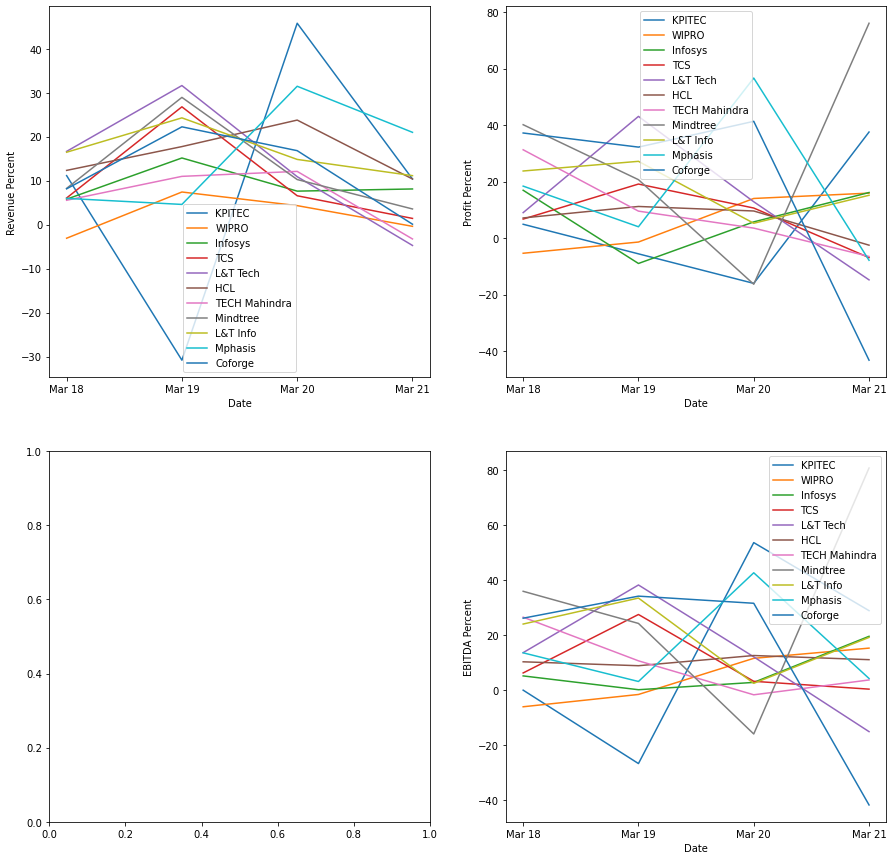

In [305]:
import matplotlib.pyplot as plt
import numpy as np
import math

fig, axs = plt.subplots(2, 2,figsize=(15,15))
# f, axs = plt.subplots(2,2)

# Define X and Y variable data
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
# y1 = np.array([float("nan"), cagr_revenue['pnl_KPITE'][2], cagr_revenue['pnl_KPITE'][1], cagr_revenue['pnl_KPITE'][0]])
y2 = np.array([cagr_revenue['pnl_KPITEC'][3], cagr_revenue['pnl_KPITEC'][2], cagr_revenue['pnl_KPITEC'][1], cagr_revenue['pnl_KPITEC'][0]])
y3 = np.array([cagr_revenue['pnl_WIPRO'][3], cagr_revenue['pnl_WIPRO'][2], cagr_revenue['pnl_WIPRO'][1], cagr_revenue['pnl_WIPRO'][0]])
y4 = np.array([cagr_revenue['pnl_Infosys'][3], cagr_revenue['pnl_Infosys'][2], cagr_revenue['pnl_Infosys'][1], cagr_revenue['pnl_Infosys'][0]])
y5 = np.array([cagr_revenue['pnl_TCS'][3], cagr_revenue['pnl_TCS'][2], cagr_revenue['pnl_TCS'][1], cagr_revenue['pnl_TCS'][0]])
y6 = np.array([cagr_revenue['pnl_LandT_tech'][3], cagr_revenue['pnl_LandT_tech'][2], cagr_revenue['pnl_LandT_tech'][1], cagr_revenue['pnl_LandT_tech'][0]])
y7 = np.array([cagr_revenue['pnl_hcl'][3], cagr_revenue['pnl_hcl'][2], cagr_revenue['pnl_hcl'][1], cagr_revenue['pnl_hcl'][0]])
y8 = np.array([cagr_revenue['pnl_techmahindra'][3], cagr_revenue['pnl_techmahindra'][2], cagr_revenue['pnl_techmahindra'][1], cagr_revenue['pnl_techmahindra'][0]])
y9 = np.array([cagr_revenue['pnl_mindtree'][3], cagr_revenue['pnl_mindtree'][2], cagr_revenue['pnl_mindtree'][1], cagr_revenue['pnl_mindtree'][0]])
y10 = np.array([cagr_revenue['pnl_landtinfotech'][3], cagr_revenue['pnl_landtinfotech'][2], cagr_revenue['pnl_landtinfotech'][1], cagr_revenue['pnl_landtinfotech'][0]])
y11 = np.array([cagr_revenue['pnl_mphasis'][3], cagr_revenue['pnl_mphasis'][2], cagr_revenue['pnl_mphasis'][1], cagr_revenue['pnl_mphasis'][0]])
y12 = np.array([cagr_revenue['pnl_coforge'][3], cagr_revenue['pnl_coforge'][2], cagr_revenue['pnl_coforge'][1], cagr_revenue['pnl_coforge'][0]])
# axs[0, 0].plot(x, y1)
axs[0, 0].plot(x, y2)
axs[0, 0].plot(x, y3)
axs[0, 0].plot(x, y4)
axs[0, 0].plot(x, y5)
axs[0, 0].plot(x, y6)
axs[0, 0].plot(x, y7)
axs[0, 0].plot(x, y8)
axs[0, 0].plot(x, y9)
axs[0, 0].plot(x, y10)
axs[0, 0].plot(x, y11)
axs[0, 0].plot(x, y12)
# plt.plot(x, y7)
axs[0, 0].set_xlabel("Date")  # add X-axis label
axs[0, 0].set_ylabel("Revenue Percent")  # add Y-axis label
# plt.title("Any suitable title")  # add title
# axs[0, 0].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
axs[0, 0].legend((
#     'KPITE',
    'KPITEC','WIPRO','Infosys','TCS','L&T Tech', 'HCL','TECH Mahindra','Mindtree','L&T Info','Mphasis','Coforge'))


# axis[0, 0].plot(X, Y1)
# plt.show()
#######################################################################################
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
# y1 = np.array([float("nan"), cagr_profit['pnl_KPITE'][2], cagr_profit['pnl_KPITE'][1], cagr_profit['pnl_KPITE'][0]])
y2 = np.array([cagr_profit['pnl_KPITEC'][3], cagr_profit['pnl_KPITEC'][2], cagr_profit['pnl_KPITEC'][1], cagr_profit['pnl_KPITEC'][0]])
y3 = np.array([cagr_profit['pnl_WIPRO'][3], cagr_profit['pnl_WIPRO'][2], cagr_profit['pnl_WIPRO'][1], cagr_profit['pnl_WIPRO'][0]])
y4 = np.array([cagr_profit['pnl_Infosys'][3], cagr_profit['pnl_Infosys'][2], cagr_profit['pnl_Infosys'][1], cagr_profit['pnl_Infosys'][0]])
y5 = np.array([cagr_profit['pnl_TCS'][3], cagr_profit['pnl_TCS'][2], cagr_profit['pnl_TCS'][1], cagr_profit['pnl_TCS'][0]])
y6 = np.array([cagr_profit['pnl_LandT_tech'][3], cagr_profit['pnl_LandT_tech'][2], cagr_profit['pnl_LandT_tech'][1], cagr_profit['pnl_LandT_tech'][0]])
y7 = np.array([cagr_profit['pnl_hcl'][3], cagr_profit['pnl_hcl'][2], cagr_profit['pnl_hcl'][1], cagr_profit['pnl_hcl'][0]])
y8 = np.array([cagr_profit['pnl_techmahindra'][3], cagr_profit['pnl_techmahindra'][2], cagr_profit['pnl_techmahindra'][1], cagr_profit['pnl_techmahindra'][0]])
y9 = np.array([cagr_profit['pnl_mindtree'][3], cagr_profit['pnl_mindtree'][2], cagr_profit['pnl_mindtree'][1], cagr_profit['pnl_mindtree'][0]])
y10 = np.array([cagr_profit['pnl_landtinfotech'][3], cagr_profit['pnl_landtinfotech'][2], cagr_profit['pnl_landtinfotech'][1], cagr_profit['pnl_landtinfotech'][0]])
y11 = np.array([cagr_profit['pnl_mphasis'][3], cagr_profit['pnl_mphasis'][2], cagr_profit['pnl_mphasis'][1], cagr_profit['pnl_mphasis'][0]])
y12 = np.array([cagr_profit['pnl_coforge'][3], cagr_profit['pnl_coforge'][2], cagr_profit['pnl_coforge'][1], cagr_profit['pnl_coforge'][0]])
# axs[0, 1].plot(x, y1)
axs[0, 1].plot(x, y2)
axs[0, 1].plot(x, y3)
axs[0, 1].plot(x, y4)
axs[0, 1].plot(x, y5)
axs[0, 1].plot(x, y6)
axs[0, 1].plot(x, y7)
axs[0, 1].plot(x, y8)
axs[0, 1].plot(x, y9)
axs[0, 1].plot(x, y10)
axs[0, 1].plot(x, y11)
axs[0, 1].plot(x, y12)
# plt.plot(x, y6)
# plt.plot(x, y7)
axs[0, 1].set_xlabel('Date')  # add X-axis label
axs[0, 1].set_ylabel("Profit Percent")  # add Y-axis label
# plt.title("Any suitable title")  # add title
# plt.gca().legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
# axs[0, 1].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC'))
axs[0, 1].legend((
#     'KPITE',
    'KPITEC','WIPRO','Infosys','TCS','L&T Tech', 'HCL','TECH Mahindra','Mindtree','L&T Info','Mphasis','Coforge'))


#############################################
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
# y1 = np.array([float("nan"), cagr_EBITDA['pnl_KPITE'][2], cagr_EBITDA['pnl_KPITE'][1], cagr_EBITDA['pnl_KPITE'][0]])
y2 = np.array([cagr_EBITDA['pnl_KPITEC'][3], cagr_EBITDA['pnl_KPITEC'][2], cagr_EBITDA['pnl_KPITEC'][1], cagr_EBITDA['pnl_KPITEC'][0]])
y3 = np.array([cagr_EBITDA['pnl_WIPRO'][3], cagr_EBITDA['pnl_WIPRO'][2], cagr_EBITDA['pnl_WIPRO'][1], cagr_EBITDA['pnl_WIPRO'][0]])
y4 = np.array([cagr_EBITDA['pnl_Infosys'][3], cagr_EBITDA['pnl_Infosys'][2], cagr_EBITDA['pnl_Infosys'][1], cagr_EBITDA['pnl_Infosys'][0]])
y5 = np.array([cagr_EBITDA['pnl_TCS'][3], cagr_EBITDA['pnl_TCS'][2], cagr_EBITDA['pnl_TCS'][1], cagr_EBITDA['pnl_TCS'][0]])
y6 = np.array([cagr_EBITDA['pnl_LandT_tech'][3], cagr_EBITDA['pnl_LandT_tech'][2], cagr_EBITDA['pnl_LandT_tech'][1], cagr_EBITDA['pnl_LandT_tech'][0]])
y7 = np.array([cagr_EBITDA['pnl_hcl'][3], cagr_EBITDA['pnl_hcl'][2], cagr_EBITDA['pnl_hcl'][1], cagr_EBITDA['pnl_hcl'][0]])
y8 = np.array([cagr_EBITDA['pnl_techmahindra'][3], cagr_EBITDA['pnl_techmahindra'][2], cagr_EBITDA['pnl_techmahindra'][1], cagr_EBITDA['pnl_techmahindra'][0]])
y9 = np.array([cagr_EBITDA['pnl_mindtree'][3], cagr_EBITDA['pnl_mindtree'][2], cagr_EBITDA['pnl_mindtree'][1], cagr_EBITDA['pnl_mindtree'][0]])
y10 = np.array([cagr_EBITDA['pnl_landtinfotech'][3], cagr_EBITDA['pnl_landtinfotech'][2], cagr_EBITDA['pnl_landtinfotech'][1], cagr_EBITDA['pnl_landtinfotech'][0]])
y11 = np.array([cagr_EBITDA['pnl_mphasis'][3], cagr_EBITDA['pnl_mphasis'][2], cagr_EBITDA['pnl_mphasis'][1], cagr_EBITDA['pnl_mphasis'][0]])
y12 = np.array([cagr_EBITDA['pnl_coforge'][3], cagr_EBITDA['pnl_coforge'][2], cagr_EBITDA['pnl_coforge'][1], cagr_EBITDA['pnl_coforge'][0]])
# axs[1, 1].plot(x, y1)
axs[1, 1].plot(x, y2)
axs[1, 1].plot(x, y3)
axs[1, 1].plot(x, y4)
axs[1, 1].plot(x, y5)
axs[1, 1].plot(x, y6)
axs[1, 1].plot(x, y7)
axs[1, 1].plot(x, y8)
axs[1, 1].plot(x, y9)
axs[1, 1].plot(x, y10)
axs[1, 1].plot(x, y11)
axs[1, 1].plot(x, y12)
# plt.plot(x, y6)
# plt.plot(x, y7)
axs[1, 1].set_xlabel('Date')  # add X-axis label
axs[1, 1].set_ylabel("EBITDA Percent")  # add Y-axis label
# plt.title("Any suitaable title")  # add title
# plt.gca().legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
# axs[0, 1].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC'))
axs[1, 1].legend((
#     'KPITE',
    'KPITEC','WIPRO','Infosys','TCS','L&T Tech', 'HCL','TECH Mahindra',
                  'Mindtree'
                  ,'L&T Info','Mphasis','Coforge'))



In [306]:
debtequity['BS_KPITE']

[array([1.25898862]),
 array([1.29333294]),
 array([1.34140795]),
 array([-0.58823529])]

In [307]:
OprtCF.keys()

dict_keys(['cs_KPITE', 'cs_KPITEC', 'cs_WIPRO', 'cs_Infosys', 'cs_TCS', 'cs_LandT_tech', 'cs_hcl', 'cs_techmahindra', 'cs_mindtree', 'cs_landtinfotech', 'cs_mphasis', 'cs_coforge'])

In [308]:
debtequity.keys()

dict_keys(['BS_KPITE', 'BS_KPITEC', 'BS_WIPRO', 'BS_Infosys', 'BS_TCS', 'BS_LandT_tech', 'BS_hcl', 'BS_techmahindra', 'BS_mindtree', 'BS_landtinfotech', 'BS_mphasis', 'BS_coforge'])

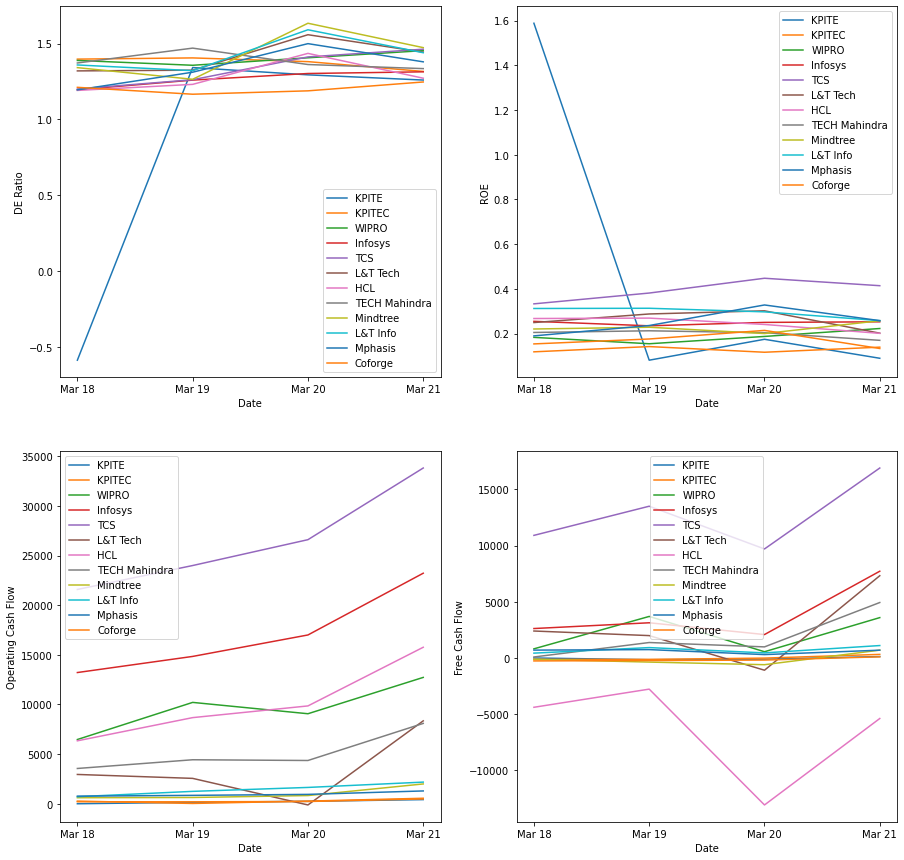

In [309]:
import matplotlib.pyplot as plt
import numpy as np
import math

fig, axs = plt.subplots(2, 2,figsize=(15,15))
# f, axs = plt.subplots(2,2)

# Define X and Y variable data
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
y1 = np.array([debtequity['BS_KPITE'][3], debtequity['BS_KPITE'][2], debtequity['BS_KPITE'][1], debtequity['BS_KPITE'][0]])
y2 = np.array([debtequity['BS_KPITEC'][3], debtequity['BS_KPITEC'][2], debtequity['BS_KPITEC'][1], debtequity['BS_KPITEC'][0]])
y3 = np.array([debtequity['BS_WIPRO'][3], debtequity['BS_WIPRO'][2], debtequity['BS_WIPRO'][1], debtequity['BS_WIPRO'][0]])
y4 = np.array([debtequity['BS_Infosys'][3], debtequity['BS_Infosys'][2], debtequity['BS_Infosys'][1], debtequity['BS_Infosys'][0]])
y5 = np.array([debtequity['BS_TCS'][3], debtequity['BS_TCS'][2], debtequity['BS_TCS'][1], debtequity['BS_TCS'][0]])
y6 = np.array([debtequity['BS_LandT_tech'][3], debtequity['BS_LandT_tech'][2], debtequity['BS_LandT_tech'][1], debtequity['BS_LandT_tech'][0]])
y7 = np.array([debtequity['BS_hcl'][3], debtequity['BS_hcl'][2], debtequity['BS_hcl'][1], debtequity['BS_hcl'][0]])
y8 = np.array([debtequity['BS_techmahindra'][3], debtequity['BS_techmahindra'][2], debtequity['BS_techmahindra'][1], debtequity['BS_techmahindra'][0]])
y9 = np.array([debtequity['BS_mindtree'][3], debtequity['BS_mindtree'][2], debtequity['BS_mindtree'][1], debtequity['BS_mindtree'][0]])
y10 = np.array([debtequity['BS_landtinfotech'][3], debtequity['BS_landtinfotech'][2], debtequity['BS_landtinfotech'][1], debtequity['BS_landtinfotech'][0]])
y11 = np.array([debtequity['BS_mphasis'][3], debtequity['BS_mphasis'][2], debtequity['BS_mphasis'][1], debtequity['BS_mphasis'][0]])
y12 = np.array([debtequity['BS_coforge'][3], debtequity['BS_coforge'][2], debtequity['BS_coforge'][1], debtequity['BS_coforge'][0]])
# y7 = np.array([cagr_adanireen_profit18, cagr_adanireen_profit19, cagr_adanireen_profit20, cagr_adanireen_profit21])

axs[0, 0].plot(x, y1)
axs[0, 0].plot(x, y2)
axs[0, 0].plot(x, y3)
axs[0, 0].plot(x, y4)
axs[0, 0].plot(x, y5)
axs[0, 0].plot(x, y6)
axs[0, 0].plot(x, y7)
axs[0, 0].plot(x, y8)
axs[0, 0].plot(x, y9)
axs[0, 0].plot(x, y10)
axs[0, 0].plot(x, y11)
axs[0, 0].plot(x, y12)
# plt.plot(x, y7)
axs[0, 0].set_xlabel("Date")  # add X-axis label
axs[0, 0].set_ylabel("DE Ratio")  # add Y-axis label
# plt.title("Any suitable title")  # add title
# axs[0, 0].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
axs[0, 0].legend(( 'KPITE','KPITEC','WIPRO','Infosys','TCS','L&T Tech', 'HCL','TECH Mahindra','Mindtree'
                  ,'L&T Info','Mphasis','Coforge'))

# axis[0, 0].plot(X, Y1)
# plt.show() roe(stockPNL, stockbs)
#######################################################################################
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
y1 = np.array([returnequity['pnl_KPITE-BS_KPITE'][3], returnequity['pnl_KPITE-BS_KPITE'][2], returnequity['pnl_KPITE-BS_KPITE'][1], returnequity['pnl_KPITE-BS_KPITE'][0]])
y2 = np.array([returnequity['pnl_KPITEC-BS_KPITEC'][3], returnequity['pnl_KPITEC-BS_KPITEC'][2], returnequity['pnl_KPITEC-BS_KPITEC'][1], returnequity['pnl_KPITEC-BS_KPITEC'][0]])
y3 = np.array([returnequity['pnl_WIPRO-BS_WIPRO'][3], returnequity['pnl_WIPRO-BS_WIPRO'][2], returnequity['pnl_WIPRO-BS_WIPRO'][1], returnequity['pnl_WIPRO-BS_WIPRO'][0]])
y4 = np.array([returnequity['pnl_Infosys-BS_Infosys'][3], returnequity['pnl_Infosys-BS_Infosys'][2], returnequity['pnl_Infosys-BS_Infosys'][1], returnequity['pnl_Infosys-BS_Infosys'][0]])
y5 = np.array([returnequity['pnl_TCS-BS_TCS'][3], returnequity['pnl_TCS-BS_TCS'][2], returnequity['pnl_TCS-BS_TCS'][1], returnequity['pnl_TCS-BS_TCS'][0]])
y6 = np.array([returnequity['pnl_LandT_tech-BS_LandT_tech'][3], returnequity['pnl_LandT_tech-BS_LandT_tech'][2], returnequity['pnl_LandT_tech-BS_LandT_tech'][1], returnequity['pnl_LandT_tech-BS_LandT_tech'][0]])
y7 = np.array([returnequity['pnl_hcl-BS_hcl'][3], returnequity['pnl_hcl-BS_hcl'][2], returnequity['pnl_hcl-BS_hcl'][1], returnequity['pnl_hcl-BS_hcl'][0]])
y8 = np.array([returnequity['pnl_techmahindra-BS_techmahindra'][3], returnequity['pnl_techmahindra-BS_techmahindra'][2], returnequity['pnl_techmahindra-BS_techmahindra'][1], returnequity['pnl_techmahindra-BS_techmahindra'][0]])
y9 = np.array([returnequity['pnl_mindtree-BS_mindtree'][3], returnequity['pnl_mindtree-BS_mindtree'][2], returnequity['pnl_mindtree-BS_mindtree'][1], returnequity['pnl_mindtree-BS_mindtree'][0]])
y10 = np.array([returnequity['pnl_landtinfotech-BS_landtinfotech'][3], returnequity['pnl_landtinfotech-BS_landtinfotech'][2], returnequity['pnl_landtinfotech-BS_landtinfotech'][1], returnequity['pnl_landtinfotech-BS_landtinfotech'][0]])
y11 = np.array([returnequity['pnl_mphasis-BS_mphasis'][3], returnequity['pnl_mphasis-BS_mphasis'][2], returnequity['pnl_mphasis-BS_mphasis'][1], returnequity['pnl_mphasis-BS_mphasis'][0]])
y12 = np.array([returnequity['pnl_coforge-BS_coforge'][3], returnequity['pnl_coforge-BS_coforge'][2], returnequity['pnl_coforge-BS_coforge'][1], returnequity['pnl_coforge-BS_coforge'][0]])

axs[0, 1].plot(x, y1)
axs[0, 1].plot(x, y2)
axs[0, 1].plot(x, y3)
axs[0, 1].plot(x, y4)
axs[0, 1].plot(x, y5)
axs[0, 1].plot(x, y6)
axs[0, 1].plot(x, y7)
axs[0, 1].plot(x, y8)
axs[0, 1].plot(x, y9)
axs[0, 1].plot(x, y10)
axs[0, 1].plot(x, y11)
axs[0, 1].plot(x, y12)
# plt.plot(x, y7)
axs[0, 1].set_xlabel('Date')  # add X-axis label
axs[0, 1].set_ylabel("ROE")  # add Y-axis label
# plt.title("Any suitable title")  # add title
# plt.gca().legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
# axs[0, 1].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC'))
axs[0, 1].legend(( 'KPITE','KPITEC','WIPRO','Infosys','TCS','L&T Tech', 'HCL','TECH Mahindra','Mindtree'
                  ,'L&T Info','Mphasis','Coforge'))

#############################################

x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
y1 = np.array([OprtCF['cs_KPITE'][3], OprtCF['cs_KPITE'][2], OprtCF['cs_KPITE'][1], OprtCF['cs_KPITE'][0]])
y2 = np.array([OprtCF['cs_KPITEC'][3], OprtCF['cs_KPITEC'][2], OprtCF['cs_KPITEC'][1], OprtCF['cs_KPITEC'][0]])
y3 = np.array([OprtCF['cs_WIPRO'][3], OprtCF['cs_WIPRO'][2], OprtCF['cs_WIPRO'][1], OprtCF['cs_WIPRO'][0]])
y4 = np.array([OprtCF['cs_Infosys'][3], OprtCF['cs_Infosys'][2], OprtCF['cs_Infosys'][1], OprtCF['cs_Infosys'][0]])
y5 = np.array([OprtCF['cs_TCS'][3], OprtCF['cs_TCS'][2], OprtCF['cs_TCS'][1], OprtCF['cs_TCS'][0]])
y6 = np.array([OprtCF['cs_LandT_tech'][3], OprtCF['cs_LandT_tech'][2], OprtCF['cs_LandT_tech'][1], OprtCF['cs_LandT_tech'][0]])
y7 = np.array([OprtCF['cs_hcl'][3], OprtCF['cs_hcl'][2], OprtCF['cs_hcl'][1], OprtCF['cs_hcl'][0]])
y8 = np.array([OprtCF['cs_techmahindra'][3], OprtCF['cs_techmahindra'][2], OprtCF['cs_techmahindra'][1], OprtCF['cs_techmahindra'][0]])
y9 = np.array([OprtCF['cs_mindtree'][3], OprtCF['cs_mindtree'][2], OprtCF['cs_mindtree'][1], OprtCF['cs_mindtree'][0]])
y10 = np.array([OprtCF['cs_landtinfotech'][3], OprtCF['cs_landtinfotech'][2], OprtCF['cs_landtinfotech'][1], OprtCF['cs_landtinfotech'][0]])
y11 = np.array([OprtCF['cs_mphasis'][3], OprtCF['cs_mphasis'][2], OprtCF['cs_mphasis'][1], OprtCF['cs_mphasis'][0]])
y12 = np.array([OprtCF['cs_coforge'][3], OprtCF['cs_coforge'][2], OprtCF['cs_coforge'][1], OprtCF['cs_coforge'][0]])
# y7 = np.array([cagr_adanireen_profit18, cagr_adanireen_profit19, cagr_adanireen_profit20, cagr_adanireen_profit21])

axs[1, 0].plot(x, y1)
axs[1, 0].plot(x, y2)
axs[1, 0].plot(x, y3)
axs[1, 0].plot(x, y4)
axs[1, 0].plot(x, y5)
axs[1, 0].plot(x, y6)
axs[1, 0].plot(x, y7)
axs[1, 0].plot(x, y8)
axs[1, 0].plot(x, y9)
axs[1, 0].plot(x, y10)
axs[1, 0].plot(x, y11)
axs[1, 0].plot(x, y12)
# plt.plot(x, y7)
axs[1, 0].set_xlabel("Date")  # add X-axis label
axs[1, 0].set_ylabel("Operating Cash Flow")  # add Y-axis label
# plt.title("Any suitable title")  # add title
# axs[0, 0].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
axs[1, 0].legend(( 'KPITE','KPITEC','WIPRO','Infosys','TCS','L&T Tech', 'HCL','TECH Mahindra','Mindtree'
                  ,'L&T Info','Mphasis','Coforge'))



######################################################
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
y1 = np.array([FreeCF['cs_KPITE-BS_KPITE'][3], FreeCF['cs_KPITE-BS_KPITE'][2], FreeCF['cs_KPITE-BS_KPITE'][1], FreeCF['cs_KPITE-BS_KPITE'][0]])
y2 = np.array([FreeCF['cs_KPITEC-BS_KPITEC'][3], FreeCF['cs_KPITEC-BS_KPITEC'][2], FreeCF['cs_KPITEC-BS_KPITEC'][1], FreeCF['cs_KPITEC-BS_KPITEC'][0]])
y3 = np.array([FreeCF['cs_WIPRO-BS_WIPRO'][3], FreeCF['cs_WIPRO-BS_WIPRO'][2], FreeCF['cs_WIPRO-BS_WIPRO'][1], FreeCF['cs_WIPRO-BS_WIPRO'][0]])
y4 = np.array([FreeCF['cs_Infosys-BS_Infosys'][3], FreeCF['cs_Infosys-BS_Infosys'][2], FreeCF['cs_Infosys-BS_Infosys'][1], FreeCF['cs_Infosys-BS_Infosys'][0]])
y5 = np.array([FreeCF['cs_TCS-BS_TCS'][3], FreeCF['cs_TCS-BS_TCS'][2], FreeCF['cs_TCS-BS_TCS'][1], FreeCF['cs_TCS-BS_TCS'][0]])
y6 = np.array([FreeCF['cs_LandT_tech-BS_LandT_tech'][3], FreeCF['cs_LandT_tech-BS_LandT_tech'][2], FreeCF['cs_LandT_tech-BS_LandT_tech'][1], FreeCF['cs_LandT_tech-BS_LandT_tech'][0]])
y7 = np.array([FreeCF['cs_hcl-BS_hcl'][3], FreeCF['cs_hcl-BS_hcl'][2], FreeCF['cs_hcl-BS_hcl'][1], FreeCF['cs_hcl-BS_hcl'][0]])
y8 = np.array([FreeCF['cs_techmahindra-BS_techmahindra'][3], FreeCF['cs_techmahindra-BS_techmahindra'][2], FreeCF['cs_techmahindra-BS_techmahindra'][1], FreeCF['cs_techmahindra-BS_techmahindra'][0]])
y9 = np.array([FreeCF['cs_mindtree-BS_mindtree'][3], FreeCF['cs_mindtree-BS_mindtree'][2], FreeCF['cs_mindtree-BS_mindtree'][1], FreeCF['cs_mindtree-BS_mindtree'][0]])
y10 = np.array([FreeCF['cs_landtinfotech-BS_landtinfotech'][3], FreeCF['cs_landtinfotech-BS_landtinfotech'][2], FreeCF['cs_landtinfotech-BS_landtinfotech'][1], FreeCF['cs_landtinfotech-BS_landtinfotech'][0]])
y11 = np.array([FreeCF['cs_mphasis-BS_mphasis'][3], FreeCF['cs_mphasis-BS_mphasis'][2], FreeCF['cs_mphasis-BS_mphasis'][1], FreeCF['cs_mphasis-BS_mphasis'][0]])
y12 = np.array([FreeCF['cs_coforge-BS_coforge'][3], FreeCF['cs_coforge-BS_coforge'][2], FreeCF['cs_coforge-BS_coforge'][1], FreeCF['cs_coforge-BS_coforge'][0]])
axs[1, 1].plot(x, y1)
axs[1, 1].plot(x, y2)
axs[1, 1].plot(x, y3)
axs[1, 1].plot(x, y4)
axs[1, 1].plot(x, y5)
axs[1, 1].plot(x, y6)
axs[1, 1].plot(x, y7)
axs[1, 1].plot(x, y8)
axs[1, 1].plot(x, y9)
axs[1, 1].plot(x, y10)
axs[1, 1].plot(x, y11)
axs[1, 1].plot(x, y12)
# plt.plot(x, y7)
axs[1, 1].set_xlabel('Date')  # add X-axis label
axs[1, 1].set_ylabel("Free Cash Flow")  # add Y-axis label
# plt.title("Any suitable title")  # add title
# plt.gca().legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
# axs[0, 1].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC'))
axs[1, 1].legend(( 'KPITE','KPITEC','WIPRO','Infosys','TCS','L&T Tech', 'HCL','TECH Mahindra','Mindtree'
                  ,'L&T Info','Mphasis','Coforge'))

#### Calculating Averages

In [310]:
dic = {}
# dic.keys() = hi, bye

In [311]:
def averagecalculation(dataarray, datatype ,  mode,duration):
    average_array = 0
    for i in dataarray:
        average_array = average_array + summation(datatype[i], mode,duration )
        
    return average_array

In [312]:
averagecalculation(index_stock_pnl, PNL_list,'Total Revenue','Mar 21')


array([385311.73])

In [313]:
Sum_Sales_average21

array([385311.73])

In [314]:
# Sales sum
Sum_Sales_average21 = averagecalculation(index_stock_pnl, PNL_list,'Total Revenue','Mar 21')
Sum_Sales_average20 = averagecalculation(index_stock_pnl, PNL_list,'Total Revenue','Mar 20')
Sum_Sales_average19 = averagecalculation(index_stock_pnl, PNL_list,'Total Revenue','Mar 19')
Sum_Sales_average18 = averagecalculation(index_stock_pnl, PNL_list,'Total Revenue','Mar 18')
# Sum_Sales_average17 = averagecalculation(index_stock_pnl, PNL_list,'Total Revenue','Mar 17') 

# Profit sum
Sum_Profit_average21 = averagecalculation(index_stock_pnl, PNL_list,'Profit/Loss For The Period','Mar 21')
Sum_Profit_average20 = averagecalculation(index_stock_pnl, PNL_list,'Profit/Loss For The Period','Mar 20')
Sum_Profit_average19 = averagecalculation(index_stock_pnl, PNL_list,'Profit/Loss For The Period','Mar 19')
Sum_Profit_average18 = averagecalculation(index_stock_pnl, PNL_list,'Profit/Loss For The Period','Mar 18')

# Profit EBITDA
Sum_EBITDA_average21 = averagecalculation(index_stock_pnl, PNL_list,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax','Mar 21')
Sum_EBITDA_average20 = averagecalculation(index_stock_pnl, PNL_list,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax','Mar 20')
Sum_EBITDA_average19 = averagecalculation(index_stock_pnl, PNL_list,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax','Mar 19')
Sum_EBITDA_average18 = averagecalculation(index_stock_pnl, PNL_list,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax','Mar 18')

In [315]:
# DE ratio
# Liabilities
Sum_DEliabilities_average21 = averagecalculation(index_stock_bs, balancesheet_list,'Total Capital And Liabilities','Mar 21')
Sum_DEliabilities_average20 = averagecalculation(index_stock_bs, balancesheet_list,'Total Capital And Liabilities','Mar 20')
Sum_DEliabilities_average19 = averagecalculation(index_stock_bs, balancesheet_list,'Total Capital And Liabilities','Mar 19')
Sum_DEliabilities_average18 = averagecalculation(index_stock_bs, balancesheet_list,'Total Capital And Liabilities','Mar 18')
# Share holder funds
Sum_DE_fundaverage21 = averagecalculation(index_stock_bs, balancesheet_list,'Total Shareholders Funds','Mar 21')
Sum_DE_fundaverage20 = averagecalculation(index_stock_bs, balancesheet_list,'Total Shareholders Funds','Mar 20')
Sum_DE_fundaverage19 = averagecalculation(index_stock_bs, balancesheet_list,'Total Shareholders Funds','Mar 19')
Sum_DE_fundaverage18 = averagecalculation(index_stock_bs, balancesheet_list,'Total Shareholders Funds','Mar 18')


Sum_fixedassets_average21 = averagecalculation(index_stock_bs, balancesheet_list,'Fixed Assets','Mar 21')
Sum_fixedassets_average20 = averagecalculation(index_stock_bs, balancesheet_list,'Fixed Assets','Mar 20')
Sum_fixedassets_average19 = averagecalculation(index_stock_bs, balancesheet_list,'Fixed Assets','Mar 19')
Sum_fixedassets_average18 = averagecalculation(index_stock_bs, balancesheet_list,'Fixed Assets','Mar 18')

In [316]:
Sum_operatingcashflow_average21 = averagecalculation(index_stock_bs, balancesheet_list,'Net CashFlow From Operating Activities','Mar 21')
Sum_operatingcashflow_average20 = averagecalculation(index_stock_bs, balancesheet_list,'Net CashFlow From Operating Activities','Mar 20')
Sum_operatingcashflow_average19 = averagecalculation(index_stock_bs, balancesheet_list,'Net CashFlow From Operating Activities','Mar 19')
Sum_operatingcashflow_average18 = averagecalculation(index_stock_bs, balancesheet_list,'Net CashFlow From Operating Activities','Mar 18')

In [1]:
example(stock)

NameError: name 'example' is not defined

In [ ]:
CAGR_AverageIndex_Sales21 = Sum_Sales_average21 / Sum_Sales_average20 -1 
CAGR_AverageIndex_Sales20 = Sum_Sales_average20 / Sum_Sales_average19 -1 
CAGR_AverageIndex_Sales19 = Sum_Sales_average19 / Sum_Sales_average18 -1 
# CAGR_AverageIndex_Sales18 = Sum_Sales_average18 / Sum_Sales_average17 -1 

CAGR_AverageIndexProfit21 =  Sum_Profit_average21 / Sum_Profit_average20 -1 
CAGR_AverageIndexProfit20 =  Sum_Profit_average20 / Sum_Profit_average19 -1 
CAGR_AverageIndexProfit19 =  Sum_Profit_average19 / Sum_Profit_average18 -1 

CAGR_AverageIndex_EBITDA21 = Sum_EBITDA_average21 / Sum_EBITDA_average20 - 1
CAGR_AverageIndex_EBITDA20 = Sum_EBITDA_average20 / Sum_EBITDA_average19 - 1
CAGR_AverageIndex_EBITDA19 = Sum_EBITDA_average19 / Sum_EBITDA_average18 - 1

ROE_AverageIndex21 = Sum_Profit_average21 / Sum_DE_fundaverage21 
ROE_AverageIndex20 = Sum_Profit_average20 / Sum_DE_fundaverage20 
ROE_AverageIndex19 = Sum_Profit_average19 / Sum_DE_fundaverage19 
ROE_AverageIndex18 = Sum_Profit_average18 / Sum_DE_fundaverage18 

DE_AverageIndex21 = Sum_DEliabilities_average21 / Sum_DE_fundaverage21 
DE_AverageIndex20 = Sum_DEliabilities_average20 / Sum_DE_fundaverage20
DE_AverageIndex19 = Sum_DEliabilities_average19 / Sum_DE_fundaverage19 
DE_AverageIndex18 = Sum_DEliabilities_average18 / Sum_DE_fundaverage18 


Operatingcashflow_AverageIndex21 = Sum_operatingcashflow_average21 / len(index_stock_bs)
Operatingcashflow_AverageIndex20 = Sum_operatingcashflow_average20 / len(index_stock_bs)
Operatingcashflow_AverageIndex19 = Sum_operatingcashflow_average19 / len(index_stock_bs)
Operatingcashflow_AverageIndex18 = Sum_operatingcashflow_average18 / len(index_stock_bs)


Fixedcashflow_AverageIndex21 = (Sum_operatingcashflow_average21 - Sum_fixedassets_average21) / len(index_stock_bs)
Fixedcashflow_AverageIndex20 = (Sum_operatingcashflow_average20 - Sum_fixedassets_average20) / len(index_stock_bs)
Fixedcashflow_AverageIndex19 = (Sum_operatingcashflow_average19 - Sum_fixedassets_average19) / len(index_stock_bs)
Fixedcashflow_AverageIndex18 = (Sum_operatingcashflow_average18 - Sum_fixedassets_average18) / len(index_stock_bs)


# power_index.iloc[:,1:] =  power_index.iloc[:,1:].astype('int')
# # Removin outlier PE
PE_AverageIndex21 = (it_index.iloc[4:5,1:].sum(axis =1).values  ) / (len(index_stock_bs))

#### Stock Selection

In [3]:
CAGR_AverageIndex_Sales21

NameError: name 'CAGR_AverageIndex_Sales21' is not defined

In [331]:
stock_list = []

# def selected_stock(cagr_revenue):
for i in cagr_revenue.keys():
    if  ( (cagr_revenue[i][0] > CAGR_AverageIndex_Sales21 *100) &
             (cagr_revenue[i][1] > CAGR_AverageIndex_Sales20 *100) 
             & (cagr_revenue[i][2] > CAGR_AverageIndex_Sales19 *100) ):
        stock_list.append(i)
    print( stock_list)
# y2 = np.array([cagr_revenue['pnl_KPITEC'][3], cagr_revenue['pnl_KPITEC'][2], cagr_revenue['pnl_KPITEC'][1], cagr_revenue['pnl_KPITEC'][0]])


[]
[]
[]
[]
[]
[]
[]
[]
['pnl_mindtree']
['pnl_mindtree', 'pnl_landtinfotech']
['pnl_mindtree', 'pnl_landtinfotech']
['pnl_mindtree', 'pnl_landtinfotech']


In [332]:
final = []
res = ['landtinfotech_url', 'mindtree_url']
for i in res:
#     print(stock[i])
     if(stock[i][6] > PE_AverageIndex21):
            final.append(i) 
            

In [333]:
final

['landtinfotech_url', 'mindtree_url']